In [1]:
import matplotlib.pyplot as plt
import random
import math
import numpy as np
from mpl_toolkits import mplot3d

In [2]:
# nadanie parametrów dla PSO
dziedzina = [(-5, 5), (-5, 5)]
ilosc_zmiennych = 2
ilosc_czasteczek = 100
ilosc_iteracji = 100
w = 0.85
c1 = 1
c2 = 2
wart_inicjacyjna = -float("inf")

In [3]:
# implementacja funkcji celu
def funkcja_celu(x):
    y = -(math.sin(3 * math.pi * x[0])) ** 2 - ((x[0] - 1) ** 2) * (1 + (math.sin(3 * math.pi * x[1])) ** 2) - (
                (x[1] - 1) ** 2) * (1 + (math.sin(2 * math.pi * x[1])) ** 2) + 100
    return y

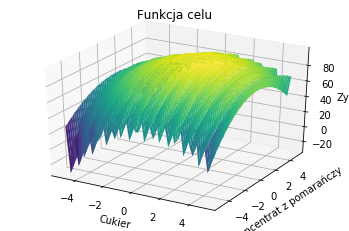

In [4]:
# wizualizacja funkcji celu
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
Z = []

for i in x:
    for j in y:
        Z.append(funkcja_celu((i, j)))
        
Z = np.array(Z).reshape(50, 50)
X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Funkcja celu');
ax.set_xlabel('Cukier')
ax.set_ylabel('Koncentrat z pomarańczy')
ax.set_zlabel('Zysk');

In [5]:
class Czasteczka:
    def __init__(self, dziedzina):
        self.pozycja_czasteczki = []  
        self.predkosc_czasteczki = [] 
        self.lokalna_najlepsza_pozycja_czasteczki = []  
        self.wartosc_funkcji_dla_najlepszego_lokalnego_polozenia = wart_inicjacyjna  
        self.wartosc_funcji_dla_polozenia_czasteczki = wart_inicjacyjna  

        for i in range(ilosc_zmiennych):
            self.pozycja_czasteczki.append(
                random.uniform(dziedzina[i][0], dziedzina[i][1]))  
            self.predkosc_czasteczki.append(random.uniform(-1, 1))  

    def porownaj(self, funkcja_celu):
        self.wartosc_funcji_dla_polozenia_czasteczki = funkcja_celu(self.pozycja_czasteczki)
        if self.wartosc_funcji_dla_polozenia_czasteczki > self.wartosc_funkcji_dla_najlepszego_lokalnego_polozenia:
            self.lokalna_najlepsza_pozycja_czasteczki = self.pozycja_czasteczki  
            self.wartosc_funkcji_dla_najlepszego_lokalnego_polozenia = self.wartosc_funcji_dla_polozenia_czasteczki  

    def przelicz_predkosc(self, najlepsza_globalna_pozycja):
        for i in range(ilosc_zmiennych):
            r1 = random.random()
            r2 = random.random()

            predkosc_kongnitywna = c1 * r1 * (self.lokalna_najlepsza_pozycja_czasteczki[i] - self.pozycja_czasteczki[i])
            predkosc_socjalna = c2 * r2 * (najlepsza_globalna_pozycja[i] - self.pozycja_czasteczki[i])
            self.predkosc_czasteczki[i] = w * self.predkosc_czasteczki[i] + predkosc_kongnitywna + predkosc_socjalna

    def przelicz_pozycje(self, dziedzina):
        for i in range(ilosc_zmiennych):
            self.pozycja_czasteczki[i] = self.pozycja_czasteczki[i] + self.predkosc_czasteczki[i]
            if self.pozycja_czasteczki[i] > dziedzina[i][1]:
                self.pozycja_czasteczki[i] = dziedzina[i][1]
            if self.pozycja_czasteczki[i] < dziedzina[i][0]:
                self.pozycja_czasteczki[i] = dziedzina[i][0]


In [6]:
# klasa przechowująca własności roju cząsteczek wraz ze zwracaniem finalnego rozwiazania problemu
class Optymalizacja_Rojem_Czasteczek():
    def __init__(self, funkcja_celu, dziedzina, ilosc_czasteczek, ilosc_iteracji):

        wartosc_funckcji_dla_najlepszej_globalnej_pozycji = wart_inicjacyjna
        najlepsza_globalna_pozycja = []
        pozycje_czasteczek = []

        for i in range(ilosc_czasteczek):
            pozycje_czasteczek.append(Czasteczka(dziedzina))
        wektor_najwyzszych_wartosci_funkcji = []

        for i in range(ilosc_iteracji):
            for j in range(ilosc_czasteczek):
                pozycje_czasteczek[j].porownaj(funkcja_celu)
                if pozycje_czasteczek[
                    j].wartosc_funcji_dla_polozenia_czasteczki > wartosc_funckcji_dla_najlepszej_globalnej_pozycji:
                    najlepsza_globalna_pozycja = list(pozycje_czasteczek[j].pozycja_czasteczki)
                    wartosc_funckcji_dla_najlepszej_globalnej_pozycji = float(
                        pozycje_czasteczek[j].wartosc_funcji_dla_polozenia_czasteczki)
            for j in range(ilosc_czasteczek):
                pozycje_czasteczek[j].przelicz_predkosc(najlepsza_globalna_pozycja)
                pozycje_czasteczek[j].przelicz_pozycje(dziedzina)

            wektor_najwyzszych_wartosci_funkcji.append(
                wartosc_funckcji_dla_najlepszej_globalnej_pozycji)  

        print('Optymalna wartość dla x1 i x2:', najlepsza_globalna_pozycja)
        print('Wartość maksymalnych zysków:', wartosc_funckcji_dla_najlepszej_globalnej_pozycji)
        print('Wykres maksymalnych wartości funkcji celu osiąganych przez rój cząsteczek w kolejnych iteracjach')
        plt.plot(wektor_najwyzszych_wartosci_funkcji)
        plt.show()

Optymalna wartość dla x1 i x2: [0.9989295012962519, 1.0051670577983907]
Wartość maksymalnych zysków: 99.99987033594314
Wykres maksymalnych wartości funkcji celu osiąganych przez rój cząsteczek w kolejnych iteracjach


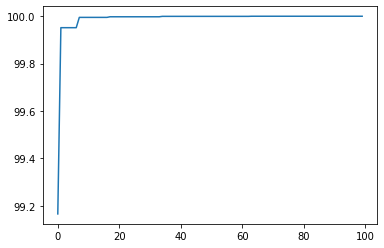

In [7]:
# wywołanie algorytmu z zadanymi parametrami oraz funckcją celu
Optymalizacja_Rojem_Czasteczek(funkcja_celu, dziedzina, ilosc_czasteczek, ilosc_iteracji)